In [32]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import base64

In [33]:
# Functions
# Function to convert integer to binary array
def int_to_binary_array(num, num_bits):
    return np.array(list(format(num, f'0{num_bits}b')), dtype=int)

# Function to convert binary array to integer
def binary_array_to_int(binary_array):
    return int(''.join(map(str, binary_array)), 2)

In [34]:
# Integer data to be sent
input_string = "a"


In [35]:
# Convert string to bytes and then encode with Base64
encoded_bytes = input_string.encode('utf-8')
integer_representation = int.from_bytes(encoded_bytes, byteorder='big')
original_data = integer_representation
binary_representation = bin(integer_representation)[2:]  # [2:] is used to remove the '0b' prefix
binary_length = len(binary_representation)

print("encoded_bytes: ", encoded_bytes)
print("integer_representation: ", integer_representation)
print("binary_representation: ", binary_representation)
print("binary_length: ", binary_length)

encoded_bytes:  b'a'
integer_representation:  97
binary_representation:  1100001
binary_length:  7


In [36]:
# Convert integer data to binary array
binary_data = int_to_binary_array(original_data, binary_length)
print("binary_data: ", binary_data)

# Use binary_data instead of the original data
data = binary_data

binary_data:  [1 1 0 0 0 0 1]


data_NZR:  [-1  1  1 -1 -1 -1 -1  1]
s_p_data:  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
s_p_data:  [[-1.  1. -1. -1.]
 [ 1. -1. -1.  1.]]
Tx_sig:  [-1.         -0.93456276 -0.86536236 -0.79267745 -0.71680071 -0.63803767
 -0.55670548 -0.47313163 -0.38765264 -0.30061272 -0.21236233 -0.12325683
 -0.03365503  0.0560823   0.1455938   0.23451904  0.32249996  0.40918229
  0.49421698  0.57726164  0.65798187  0.73605263  0.81115958  0.88300026
  0.95128542  1.01574009  1.07610473  1.13213628  1.18360911  1.23031597
  1.27206878  1.30869942  1.34006039  1.3660254   1.38648992  1.40137153
  1.41061031  1.41416906  1.41203345  1.40421208  1.39073645  1.3716608
  1.34706197  1.31703899  1.28171276  1.24122553  1.19574032  1.14544028
  1.09052797  1.03122448  0.96776861  0.90041588  0.82943749  0.75511925
  0.67776042  0.59767248  0.51517792  0.43060893  0.34430602  0.25661672
  0.16789411  0.07849545 -0.01121928 -0.10088884 -0.19015215 -0.27864979
 -0.3660254  -0.45192716 -0.53600917 -0.61793286 -0.69736834

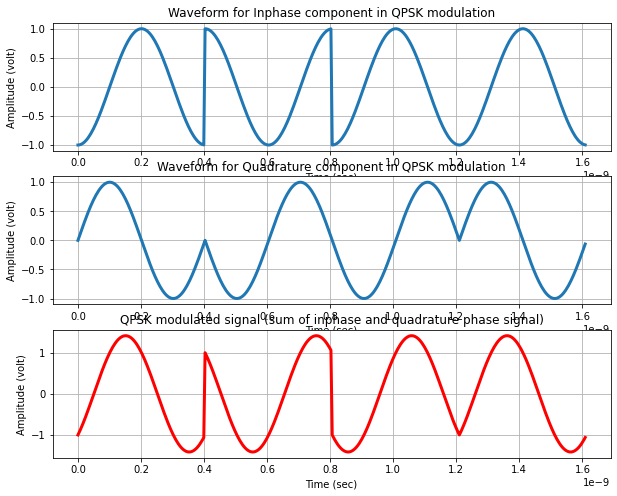

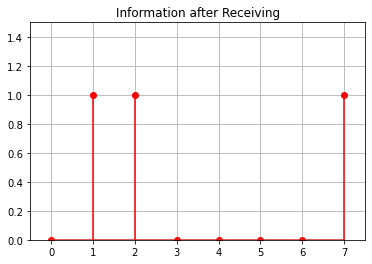

Sent Word: a
Received Word: a


In [38]:
# Inserts a 0 at the beginning if data contains an odd number of bits
if len(data) % 2 == 1:
    data = np.insert(data, 0, 0)
    
    
# QPSK modulation parameters

# bit rate 
br = 2.48e9  # Is this set to sample_frequency?
# carrier frequency
f = br      # Is this set to center_frequency?
# bit duration
T = 1/br    # What is this?

# Data Represented at NZR form for QPSK modulation
data_NZR = 2 * data - 1 # What is NZR
print("data_NZR: ", data_NZR)

# S/P conversion of data
counter = 0
s_p_data = np.zeros((2, len(data_NZR)//2))
print("s_p_data: ", s_p_data)

counter = 0
for i in data_NZR:

    if counter % 2 == 0:
        s_p_data[0, counter//2] = i
    else:
        s_p_data[1, counter//2] = i
    counter += 1
#s_p_data = data_NZR.reshape(2, len(data)//2)

# Time vector for one bit information
t = np.arange(0, T * (len(data)//2), T/99)

print("s_p_data: ", s_p_data)

# QPSK modulation
y_in = np.array([])
y_qd = np.array([])
y = np.array([])

# Carrier Modulation?
for i in range(len(data)//2):
    y1 = s_p_data[0, i] * np.cos(2 * np.pi * f * t[i*99:(i+1)*99])
    y2 = s_p_data[1, i] * np.sin(2 * np.pi * f * t[i*99:(i+1)*99])
    #print("y1: ", y1)
    #print("y2: ", y2)
    y_in = np.append(y_in, y1)
    y_qd = np.append(y_qd, y2)
    y = np.append(y, y1 + y2)

Tx_sig = y  # transmitting signal after modulation

# print("length of y_in: ", len(y_in))
# print("y_in: ", y_in)
#print("length of y_qd: ", len(y_qd))
# print("y_qd: ", y_qd)
print("Tx_sig: ", Tx_sig)

# Plotting
tt = np.arange(0, T*(len(data)/2), T/99)
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(tt, y_in, linewidth=3)
plt.grid(True)
plt.title('Waveform for Inphase component in QPSK modulation')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')

plt.subplot(3, 1, 2)
plt.plot(tt, y_qd, linewidth=3)
plt.grid(True)
plt.title('Waveform for Quadrature component in QPSK modulation')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')

plt.subplot(3, 1, 3)
plt.plot(tt, Tx_sig, 'r', linewidth=3)
plt.grid(True)
plt.title('QPSK modulated signal (sum of inphase and quadrature phase signal)')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')

# QPSK demodulation
Rx_data = np.array([])
Rx_sig = Tx_sig  # Received signal
# Wes adding
# Z_in = np.array([])
# Z_qd = np.array([])
# Wes done adding


for i in range(len(data)//2):
    # Carrier Demodulation?
    # Inphase coherent detector
    Z_in = Rx_sig[i*99:(i+1)*99] * np.cos(2 * np.pi * f * t[i*99:(i+1)*99])
    # QPSK Demodulation
    Z_in_intg = np.trapz(Z_in) * (2 / T)
    #print(Z_in_intg)
    if Z_in_intg > 0:
        Rx_in_data = 1
    else:
        Rx_in_data = 0
    # Carrier Demodulation?
    # Quadrature coherent detector
    Z_qd = Rx_sig[i*99:(i+1)*99] * np.sin(2 * np.pi * f * t[i*99:(i+1)*99])
    # QPSK Demodulation
    Z_qd_intg = np.trapz(Z_qd) * (2 / T)
    #print(Z_qd_intg)
    if Z_qd_intg > 0:
        Rx_qd_data = 1
    else:
        Rx_qd_data = 0
    Rx_data = np.append(Rx_data, [Rx_in_data, Rx_qd_data])
    
# print("length of Z_in: ", len(Z_in))
# print("Z_in: ", Z_in)

# Plotting received data
plt.figure()
plt.stem(range(len(Rx_data)), Rx_data, linefmt='r-', markerfmt='ro')
plt.title('Information after Receiving')
plt.axis([-.5, binary_length + .5, 0, 1.5])
plt.grid(True)


received_integer = binary_array_to_int(Rx_data.astype(int))
# Convert integer to bytes
rec_bytes_representation = received_integer.to_bytes((received_integer.bit_length() + 7) // 8, byteorder='big')

# Decode bytes back to string
decoded_string = rec_bytes_representation.decode('utf-8')


plt.show()

print("Sent Word:", input_string)
print("Received Word:", decoded_string)